<a href="https://colab.research.google.com/github/polarbeariceskating/AI2023/blob/main/Bootcamp_Project911.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.jso

mkdir: cannot create directory ‘/root/.kaggle’: File exists
chmod: cannot access '/root/.kaggle/kaggle.jso': No such file or directory


In [ ]:
#unduh dataset
!kaggle datasets download -d mchirico/montcoalert

 70% 17.0M/24.2M [00:00<00:00, 43.4MB/s]
100% 24.2M/24.2M [00:00<00:00, 59.0MB/s]


In [ ]:
!unzip montcoalert.zip

Archive:  montcoalert.zip
replace 911.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: 911.csv                 


In [ ]:
#impor pustaka yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('911.csv')
df.info()
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB
              lat        lng  \
0       40.297876 -75.581294   
1       40.258061 -75.264680   
2       40.121182 -75.351975   
3       40.116153 -75.343513   
4       40.251492 -75.603350   
...           ...        ...   
663517  40.157956 -75.348060   
663518  40.136306 -75.428697   
663519  40.013779 -75.300835   
663520  40.121603 -75.351437   
663521  40.015046 -75.29

In [ ]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1


In [ ]:
#cek top 5 zipcode dari 911
cd = df['zip'].value_counts().head(5)
print(cd)
print()
#cek top 5 townships dari 911
dc = df['twp'].value_counts().head(5)
print(dc)

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64


In [ ]:
#cek berapa banyak judul unique
cd = df['title'].nunique()
print(cd)

148


In [ ]:
#membuat fitur baru
cd = df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])
print(cd)
print()
dc = df['Reason'].value_counts()
print(dc)
print(df)

0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
           ...   
663517    Traffic
663518        EMS
663519        EMS
663520       Fire
663521    Traffic
Name: title, Length: 663522, dtype: object

EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64
              lat        lng  \
0       40.297876 -75.581294   
1       40.258061 -75.264680   
2       40.121182 -75.351975   
3       40.116153 -75.343513   
4       40.251492 -75.603350   
...           ...        ...   
663517  40.157956 -75.348060   
663518  40.136306 -75.428697   
663519  40.013779 -75.300835   
663520  40.121603 -75.351437   
663521  40.015046 -75.299674   

                                                     desc      zip  \
0       REINDEER CT & DEAD END;  NEW HANOVER; Station ...  19525.0   
1       BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...  19446.0   
2       HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...  19401.0   
3       AIRY

<Axes: xlabel='Reason', ylabel='count'>

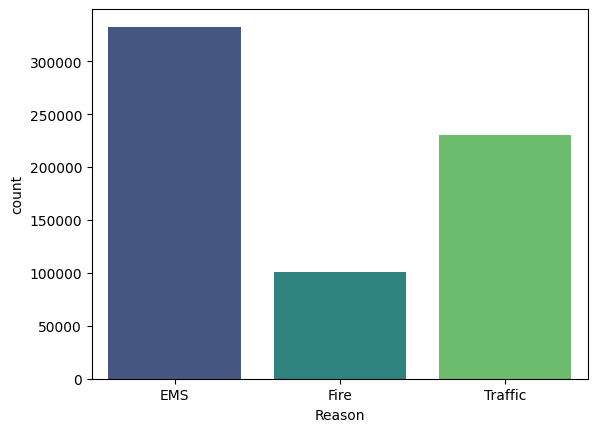

In [ ]:
sns.countplot(x='Reason',data=df,palette='viridis')

In [ ]:
cd = type(df['timeStamp'].iloc[0])
print(cd)

<class 'str'>


In [ ]:
# mengubah data string menjadi objek data waktu
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
print(df)

              lat        lng  \
0       40.297876 -75.581294   
1       40.258061 -75.264680   
2       40.121182 -75.351975   
3       40.116153 -75.343513   
4       40.251492 -75.603350   
...           ...        ...   
663517  40.157956 -75.348060   
663518  40.136306 -75.428697   
663519  40.013779 -75.300835   
663520  40.121603 -75.351437   
663521  40.015046 -75.299674   

                                                     desc      zip  \
0       REINDEER CT & DEAD END;  NEW HANOVER; Station ...  19525.0   
1       BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...  19446.0   
2       HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...  19401.0   
3       AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...  19401.0   
4       CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...      NaN   
...                                                   ...      ...   
663517  SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...  19403.0   
663518  EAGLEVILLE RD & BUNTING CIR;  LOWER PROVIDENCE.

In [ ]:
# melakukan extraksi informasi waktu dari kolom timestamp ke kolom baru dataframe
#fungsi .apply() digunakan untuk menerapkan fungsi lambda setiap entri pada kolom timeStamp
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)


In [ ]:
print(df)

              lat        lng  \
0       40.297876 -75.581294   
1       40.258061 -75.264680   
2       40.121182 -75.351975   
3       40.116153 -75.343513   
4       40.251492 -75.603350   
...           ...        ...   
663517  40.157956 -75.348060   
663518  40.136306 -75.428697   
663519  40.013779 -75.300835   
663520  40.121603 -75.351437   
663521  40.015046 -75.299674   

                                                     desc      zip  \
0       REINDEER CT & DEAD END;  NEW HANOVER; Station ...  19525.0   
1       BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...  19446.0   
2       HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...  19401.0   
3       AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...  19401.0   
4       CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...      NaN   
...                                                   ...      ...   
663517  SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...  19403.0   
663518  EAGLEVILLE RD & BUNTING CIR;  LOWER PROVIDENCE.

In [ ]:
cd = df['timeStamp'].iloc[0]
cd.dayofweek

3

In [ ]:
# pada tipe data hari berupa integer, jadi dilakukan perubahan ke string
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'} #memetakan angka 0-6 ke nama bahasa inggris
df['Day of Week'] = df['Day of Week'].map(dmap) #mengganti value dalam kolom Day of Week, menjadi string
print(df)

              lat        lng  \
0       40.297876 -75.581294   
1       40.258061 -75.264680   
2       40.121182 -75.351975   
3       40.116153 -75.343513   
4       40.251492 -75.603350   
...           ...        ...   
663517  40.157956 -75.348060   
663518  40.136306 -75.428697   
663519  40.013779 -75.300835   
663520  40.121603 -75.351437   
663521  40.015046 -75.299674   

                                                     desc      zip  \
0       REINDEER CT & DEAD END;  NEW HANOVER; Station ...  19525.0   
1       BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...  19446.0   
2       HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...  19401.0   
3       AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...  19401.0   
4       CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...      NaN   
...                                                   ...      ...   
663517  SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...  19403.0   
663518  EAGLEVILLE RD & BUNTING CIR;  LOWER PROVIDENCE.

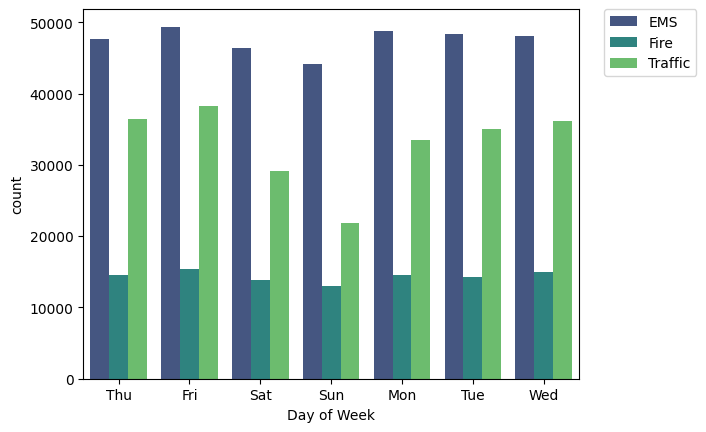

In [ ]:
# membuat grafik count menggunakan sns, untuk menvisualisaikan frekuensi (jumlah)
# pemisahan bersadarkan kolom "reason"
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='viridis')
# membuat plot legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

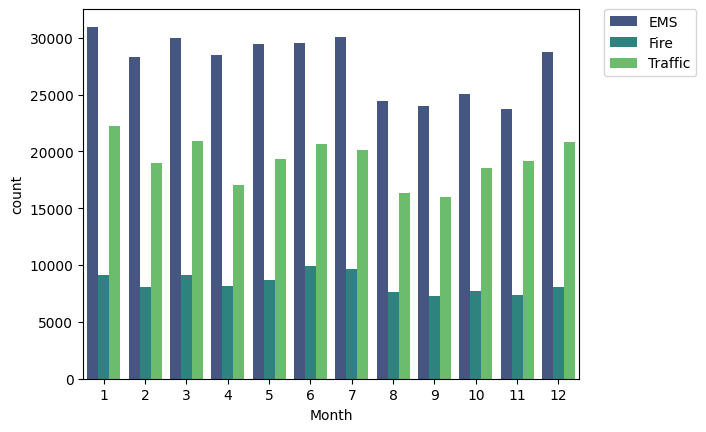

In [ ]:
# membuat grafik count menggunakan sns, untuk menvisualisaikan frekuensi (jumlah) berdasarkan hari dalam seminggu
# pemisahan bersadarkan kolom "reason"
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')

# membuat plot legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<Axes: xlabel='Month'>

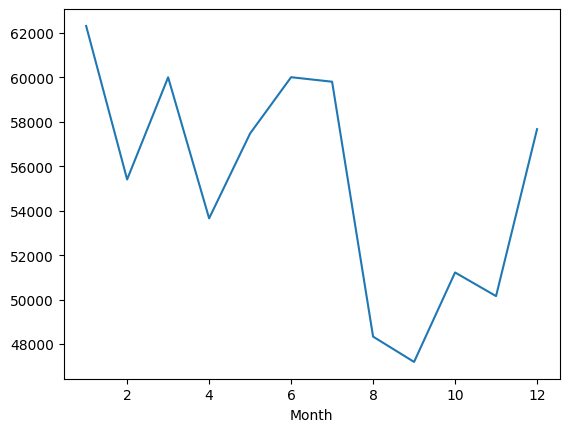

In [ ]:
# menghitung jumlah (count) entri untuk setiap bulan
byMonth = df.groupby('Month').count()
byMonth.head()
byMonth['twp'].plot()

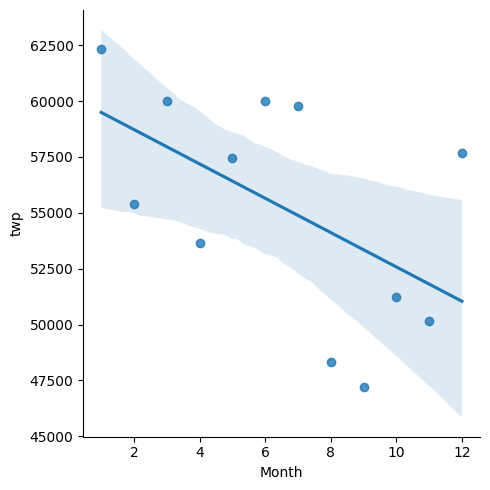

In [ ]:
# membuat plot regresi linear antara variabel bulan dan twp
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

In [ ]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thu,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354


<Axes: xlabel='Hour', ylabel='Day of Week'>

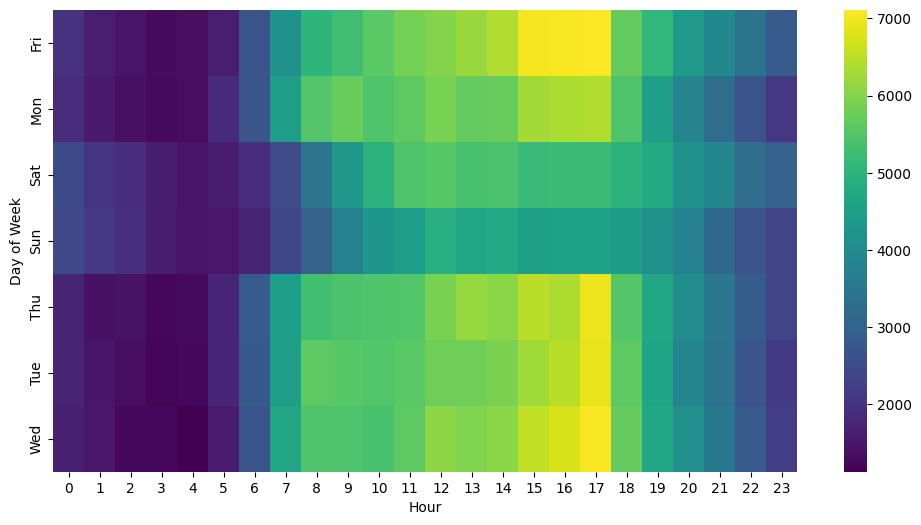

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')